In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("refinery_uncleaned_data.csv")

In [18]:
recommendations = [
        "Focus on optimizing maintenance schedules to reduce costs.",
        "Improve operational efficiency in underperforming regions.",
        "Invest in refineries with potential for capacity expansion.",
        "Enhance supplier diversity to boost efficiency scores."
    ]

In [30]:
#Clean data
df = df.drop_duplicates()    

#Handle missing data
cleaned_data = df.fillna(df.mean(numeric_only=True))
cleaned_file_path = 'cleaned_dataset.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to cleaned_dataset.csv



Analyzing Refinery Capacities by Region...


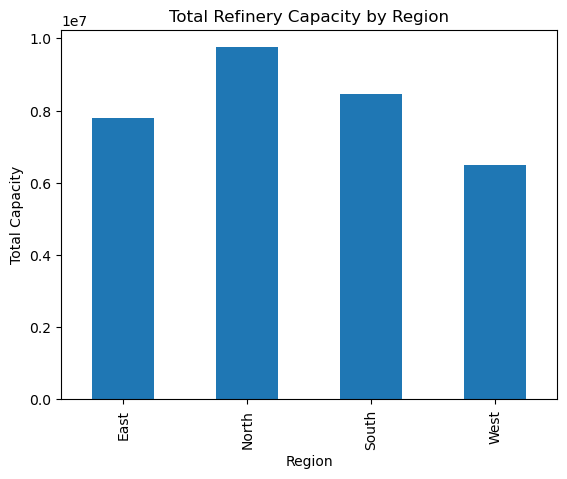

Region
East     7800000.0
North    9750000.0
South    8450000.0
West     6500000.0
Name: Capacity, dtype: float64

Analyzing Operational Efficiency by Status...


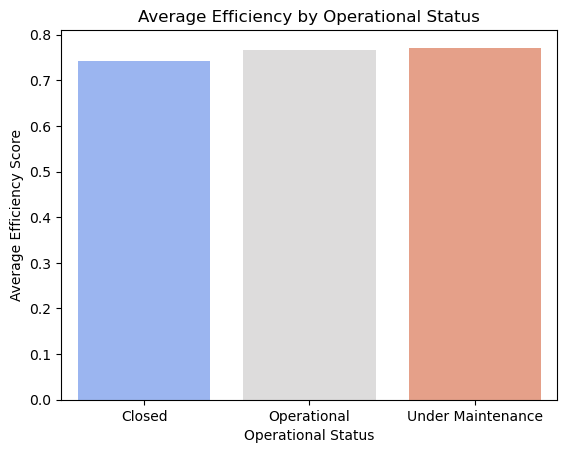

OperationalStatus
Closed               0.743442
Operational          0.766204
Under Maintenance    0.771583
Name: EfficiencyScore, dtype: float64

Analyzing Maintenance Costs...


C:\Users\Oremoxie\anaconda3\envs\nexford-base\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


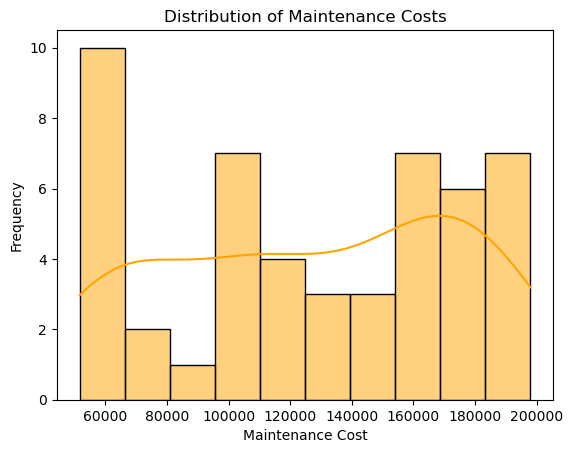

   RefineryID Region  Capacity  OperationalStatus  AverageShipmentValue  \
0        R001  South  650000.0             Closed          170059.10848   
2        R003   East  650000.0        Operational          170059.10848   
3        R004   West  650000.0             Closed          170059.10848   
5        R006   East  650000.0        Operational          170059.10848   
7        R008  South  650000.0  Under Maintenance          170059.10848   
9        R010  North  650000.0        Operational          170059.10848   
12       R013  South  650000.0             Closed          170059.10848   
15       R016  North  650000.0             Closed          170059.10848   
16       R017   West  650000.0             Closed          170059.10848   
17       R018   West  650000.0             Closed          170059.10848   
18       R019   West  650000.0        Operational          170059.10848   
22       R023   East  650000.0             Closed          170059.10848   
23       R024   East  650

C:\Users\Oremoxie\anaconda3\envs\nexford-base\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Oremoxie\anaconda3\envs\nexford-base\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


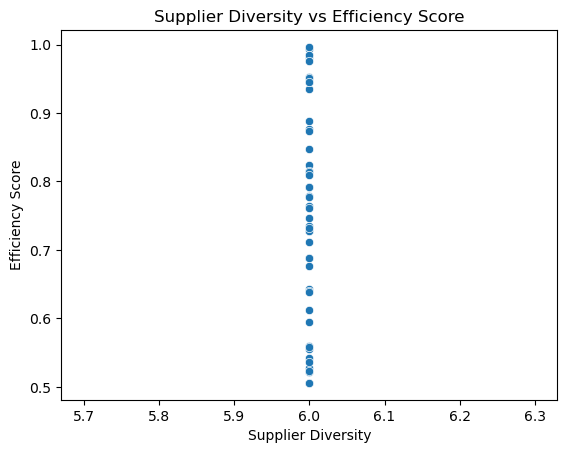

Correlation between supplier diversity and efficiency: nan

Recommendations:
- Focus on optimizing maintenance schedules to reduce costs.
- Improve operational efficiency in underperforming regions.
- Invest in refineries with potential for capacity expansion.
- Enhance supplier diversity to boost efficiency scores.


In [28]:

def analyze_capacity_distribution(data):
    """Analyzes and visualizes refinery capacities by region."""
    capacity_distribution = data.groupby('Region')['Capacity'].sum()
    capacity_distribution.plot(kind='bar', title='Total Refinery Capacity by Region', xlabel='Region', ylabel='Total Capacity')
    plt.show()
    return capacity_distribution


def analyze_efficiency_by_status(data):
    """Analyzes efficiency scores based on operational status."""
    status_efficiency = data.groupby('OperationalStatus')['EfficiencyScore'].mean()
    sns.barplot(x=status_efficiency.index, y=status_efficiency.values, palette='coolwarm')
    plt.title('Average Efficiency by Operational Status')
    plt.xlabel('Operational Status')
    plt.ylabel('Average Efficiency Score')
    plt.show()
    return status_efficiency



def analyze_maintenance_costs(data):
    """Identifies refineries with high maintenance costs."""
    high_maintenance = data[data['MaintenanceCost'] > data['MaintenanceCost'].mean()]
    sns.histplot(data['MaintenanceCost'], bins=10, kde=True, color='orange')
    plt.title('Distribution of Maintenance Costs')
    plt.xlabel('Maintenance Cost')
    plt.ylabel('Frequency')
    plt.show()
    return high_maintenance

# Correlation Analysis Between Supplier Diversity and Efficiency
def analyze_supplier_efficiency_correlation(data):
    """Analyzes correlation between supplier diversity and efficiency."""
    correlation = data['SupplierDiversity'].corr(data['EfficiencyScore'])
    sns.scatterplot(x='SupplierDiversity', y='EfficiencyScore', data=data)
    plt.title('Supplier Diversity vs Efficiency Score')
    plt.xlabel('Supplier Diversity')
    plt.ylabel('Efficiency Score')
    plt.show()
    return correlation


def generate_recommendations():
    """Provides actionable recommendations based on insights."""
    recommendations = [
        "Focus on optimizing maintenance schedules to reduce costs.",
        "Improve operational efficiency in underperforming regions.",
        "Invest in refineries with potential for capacity expansion.",
        "Enhance supplier diversity to boost efficiency scores."
    ]
    return recommendations

print("\nAnalyzing Refinery Capacities by Region...")
capacity_distribution = analyze_capacity_distribution(cleaned_data)
print(capacity_distribution)

print("\nAnalyzing Operational Efficiency by Status...")
efficiency_by_status = analyze_efficiency_by_status(cleaned_data)
print(efficiency_by_status)

print("\nAnalyzing Maintenance Costs...")
high_maintenance = analyze_maintenance_costs(cleaned_data)
print(high_maintenance)

print("\nAnalyzing Supplier Diversity and Efficiency Correlation...")
supplier_correlation = analyze_supplier_efficiency_correlation(cleaned_data)
print(f"Correlation between supplier diversity and efficiency: {supplier_correlation}")

print("\nRecommendations:")

for rec in recommendations:
        print(f"- {rec}")